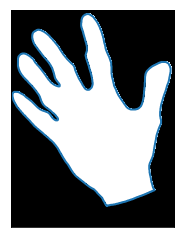

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

from skimage import measure
from skimage.color import rgb2grey

r = rgb2grey(mpimg.imread('shape2.png'))

# Find contours at a constant value of 0.8
contours = measure.find_contours(r, 0.8)

# Display the image and plot all contours found
fig, ax = plt.subplots()
ax.imshow(r, interpolation='nearest', cmap=plt.cm.gray)

for contour in (contours):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

3571


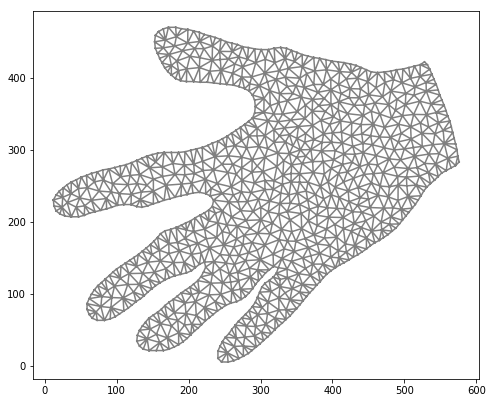

In [9]:
from dolfin import *
from mshr import *

# Select the biggest contour
max_contour = sorted(contours, key=lambda x:len(x), reverse=True)[0]
print len(max_contour)

# Generate the mesh
domain_vertices = [Point(x,y) for x,y in max_contour[-1:0:-10]]

n = 24
geometry = Polygon(domain_vertices)
mesh = generate_mesh(geometry,n)
plt.figure(figsize=(8,8))
plot(mesh)



Discrete space size: 920
0.00225416750952 0.0
0.00234516124668 0.0
0.00250060426827 0.0
0.00273479455387 0.0
0.00292648624273 0.0


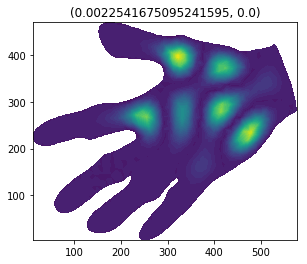

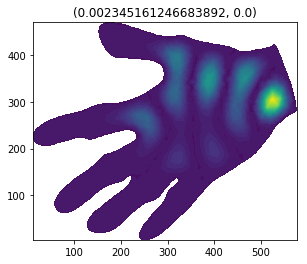

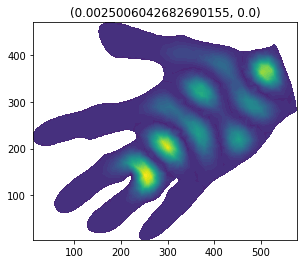

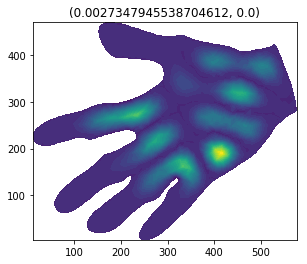

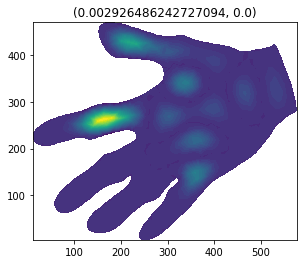

In [15]:
k = 4 #Which eigenfuncion should we plot, in order of smallest magnitude eigenvalue

V = FunctionSpace(mesh, 'Lagrange', 1)
bc = DirichletBC(V, 0.0, DomainBoundary())
u, v = TrialFunction(V), TestFunction(V)

a = inner(grad(u), grad(v))*dx
L = Constant(0.0)*v*dx
m = u*v*dx

A, _ = assemble_system(a, L, bc)
B = assemble(m)

print "Discrete space size: %d"%V.dim()
eigensolver = SLEPcEigenSolver(as_backend_type(A), as_backend_type(B))
#prm = eigensolver.parameters
#info(prm, True)
eigensolver.parameters['spectrum'] = 'smallest magnitude'

eigensolver.solve(20)
eig = Function(V)
eig_vec = eig.vector()

for k in range(10,15):
    r, c, rx, cx = eigensolver.get_eigenpair(k)
    import numpy as np
    eig_vec[:] = rx #np.log(rx*rx)
    print r, c
    plt.figure()
    import numpy as np
    plot(eig*eig)
    
    pressure = eig*eig
    velocity = grad(pressure)

    plt.title((r,c))